<a href="https://colab.research.google.com/github/DerekSHAOZH/FUB-22Win-Phylogeny-Inference-and-Application/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 (20 points)

## a) (15 points) Write a function ``` GetStationaryDistribution(rate_matrix) ``` that takes as input a rate matrix and returns its stationary distribution. Use the following rate matrix for this task. 

$Q = 	\begin{bmatrix} 
	Q(a→a) & Q(a→t) & Q(a→g) & Q(a→c)\\
	Q(t→a) & Q(t→t) & Q(t→g) & Q(t→c)\\
	Q(g→a) & Q(g→t) & Q(g→g) & Q(g→c)\\
  Q(c→a) & Q(c→t) & Q(c→g) & Q(c→c) \\
	\end{bmatrix} =	\begin{bmatrix} 
	-18 & 14 & 2 & 2\\
	14 & -18 & 2 & 2\\
	8 & 8 & -18 & 2\\
  8 & 8 & 2 & -18 \\
	\end{bmatrix} $
	

## What is the stationary distribution of $Q$ ?

## b) (5 points) Write a function ``` ExponentiateRateMatrix(rate_matrix, branch_length) ``` that takes as input a rate matrix $Q$ and branch length $t$, and returns the probability matrix $P=e^{Qt}$ (also known as the transition matrix in theory of Markov models). Use the function scipy.linalg.expm(). Use the rate matrix from Problem 1a, and branch lengths $10^{-3}$ and 0.1 for this task. 

## Let $P_{0.001} = e^{Q\times 0.001}$, and let $P_{0.1} = e^{Q\times 0.1}$. What are the entries in $P_{0.001}$ and $P_{0.1}$?

#1.(a)

In [ ]:
import numpy as np
Q = np.array([[-18, 14, 2, 2], 
            [14, -18, 2, 2],
            [8, 8, -18, 2],
            [8, 8, 2, -18]])



In [ ]:
def GetStationaryDistribution(rate_matrix):
  # pi.Q = 0 then Q_T.pi_T = 0
  # constrain: [1,1,1,1].pi_T = 1
  A = np.append(rate_matrix.transpose(),[[1,1,1,1]],axis=0)  # A = [Q_T [1,1,1,1]]
  b = (np.array([0,0,0,0,1])).transpose()                    

  pi = np.linalg.solve(np.dot(A.transpose(), A), np.dot(A.transpose(), b)) #only square matrix, so A_T.A.pi = A_T.b, like in LS

  return pi

In [ ]:
sd = GetStationaryDistribution(Q)
print("Stationary distribution of Q is", sd)

Stationary distribution of Q is [0.4 0.4 0.1 0.1]


4.440892098500626e-16

#1.(b)

In [ ]:
from scipy import linalg

def ExponentiateRateMatrix(rate_matrix, branch_length):
  P = linalg.expm(rate_matrix*branch_length)
  return P


In [ ]:
P1 = ExponentiateRateMatrix(Q, 0.001)
P2 = ExponentiateRateMatrix(Q, 0.1)

print("P_0.001 = \n",  P1)
print("P_0.1 = \n", P2)

P_0.001 = 
 [[0.98227316 0.01376658 0.00198013 0.00198013]
 [0.01376658 0.98227316 0.00198013 0.00198013]
 [0.00792053 0.00792053 0.98217881 0.00198013]
 [0.00792053 0.00792053 0.00198013 0.98217881]]
P_0.1 = 
 [[0.43391463 0.39315243 0.08646647 0.08646647]
 [0.39315243 0.43391463 0.08646647 0.08646647]
 [0.34586589 0.34586589 0.22180175 0.08646647]
 [0.34586589 0.34586589 0.08646647 0.22180175]]


# Problem 2 (30 points)

##Use the following Markov Chains $C_{1}$ and $C_{2}$.

##$C_{1}: X_{1,0}→X_{1,1}→X_{1,2}\ldots X_{1,n-1}→X_{1,n}$, where each transition is performed using the probability matrix $P_{0.001}$

##$C_{2}: X_{2,0}→X_{2,1}→X_{2,2}\ldots X_{2,n-1}→X_{2,n}$, where each transition is performed using the probability matrix $P_{0.1}$

##Let all the sequences be 1000 bp long. Let $\hat{\pi}_{i,j}$ be the estimated base frequency of sequence $X_{i,j}$. Let $\pi_\rho$ be the base frequency of the root sequence which is set to $[a:0.1,t:0.1,g:0.4,c:0.4]$, representing a highly GC-rich genomic region.

## a) (25 Points) Simulating $C_1$

##Compute $X_{1,0}$ by sampling 1000 characters from the probability distribution defined by $\pi_{\rho}$. Simulate sequence evolution and compute the estimated base frequency $\hat{\pi}_{1,i}$ for each sequence $X_{1,i}$ 

You may follow the instuctions given by Ziheng Yang for sampling from probability distributions. Please refer to Chapter 12 from Ziheng Yang's book for further detail.


##After how many steps $n$ does the estimated base frequency approach the stationary distribution of $Q$?

## b) (5 Points) Simulate $C_2$ using a similar procedure as you did for Problem 2a. Use $P_{0.1}$ to simulate sequence evolution instead of $P_{0.001}$.

##After how many steps $n$ does the estimated base frequency approach the stationary distribution of $Q$?



#2.(b) Inversion method for sampling from a general discrete distribution
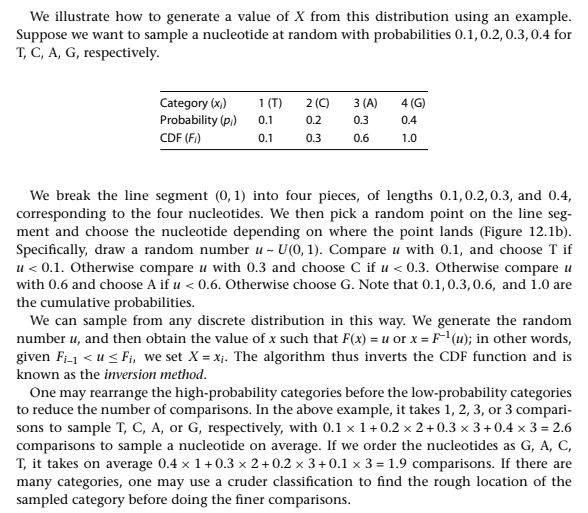

In [ ]:
# break (0,1) into {(0,0.4):g, (0.4,0.8):c, (0.8,0.9):a, (0.9,1):t}
from random import random
from random import seed

def computeSampledFrequency():
  seed(1234)
  freq = {'a':0, 't':0, 'g':0, 'c':0}
  for i in range(1000):
    x=np.random.uniform(0.0, 1.0)
    if x < 0.4:
      freq['g'] += 1
    elif x < 0.8:
      freq['c'] += 1
    elif x < 0.9:
      freq['a'] += 1
    else:
      freq['t'] += 1

  result = {key: value/1000 for key, value in freq.items()}

  return result

In [ ]:
X = computeSampledFrequency()
print("X_1,0 = ", X)


X_1,0 =  {'a': 0.108, 't': 0.096, 'g': 0.401, 'c': 0.395}


array([0.108, 0.096, 0.401, 0.395])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def simulation(transition_matrix, simulation_step):
  state = computeSampledFrequency()    # root frequency X_1,0
  state = np.array(list(state.values()))
  states = state

  for k in range(simulation_step):
    state = np.dot(state,transition_matrix)           # pi_k = pi_(k-1).P1
    states = np.vstack((states,state))

  dfStates = pd.DataFrame(states)
  dfStates.columns = ['a', 't', 'g', 'c']

  return dfStates




In [ ]:
dfStates1 = simulation(P1, 500)

dfStates1

,a,t,g,c
0,0.100000,0.094000,0.404000,0.402000
1,0.105905,0.100094,0.397980,0.396020
2,0.111695,0.106067,0.392080,0.390158
3,0.117371,0.111920,0.386296,0.384413
4,0.122935,0.117656,0.380627,0.378781
...,...,...,...,...
496,0.399985,0.399985,0.100015,0.100015
497,0.399985,0.399985,0.100015,0.100015
498,0.399986,0.399986,0.100014,0.100014
499,0.399986,0.399986,0.100014,0.100014


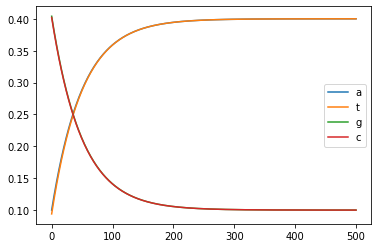

In [ ]:
dfStates1.plot()

plt.show()

# C1 converges at around 250-th step

#2.(b)

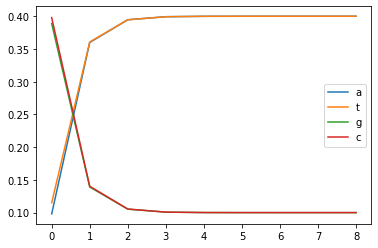

In [ ]:
dfStates1 = simulation(P2, 8)

dfStates1.plot()

plt.show()

# C2 converges at around 3rd step